<a href="https://colab.research.google.com/github/LAUROJAS3/Seminario_RN/blob/main/LRC_P11_PROYECCION_COSTO_CASAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#1- Cargar datos
housing = fetch_california_housing()
x,y = housing.data, housing.target


In [ ]:
print(x.shape)
print(y.shape)
#20640 es el target

(20640, 8)
(20640,)


In [ ]:
print(x[1000])
print(y[1000])

[ 3.38410000e+00  2.90000000e+01  4.84203103e+00  1.00282087e+00
  1.91900000e+03  2.70662906e+00  3.76900000e+01 -1.21760000e+02]
1.844


In [ ]:
#2- Dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
print(x_train[0])
#3- Normalizar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train[0])

[ 3.25960000e+00  3.30000000e+01  5.01765650e+00  1.00642055e+00
  2.30000000e+03  3.69181380e+00  3.27100000e+01 -1.17030000e+02]
[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
 -1.3728112   1.27258656]


In [ ]:
#4- Crear el modelo
#Representa red neuronal
#64 neuronas tipo perceptron
#funcion activacion relu
model=tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=x_train.shape[1:]),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(1)]) #salida continua

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#5 Entrenar el modelo - todo lo que pasa en el entrenamiento

history=model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

#6. Evaluar el modelo
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"MAE en test: {test_mae:.2f}")

#7.cGraficar perdidas
plt.figure(figsize=(12,5))


Epoch 1/100
413/413 - 3s - 7ms/step - loss: 0.7735 - mae: 0.6057 - val_loss: 0.4569 - val_mae: 0.4894
Epoch 2/100
413/413 - 2s - 5ms/step - loss: 0.3928 - mae: 0.4477 - val_loss: 0.3967 - val_mae: 0.4567
Epoch 3/100
413/413 - 1s - 3ms/step - loss: 0.3686 - mae: 0.4278 - val_loss: 0.3752 - val_mae: 0.4314
Epoch 4/100
413/413 - 1s - 2ms/step - loss: 0.3444 - mae: 0.4164 - val_loss: 0.3798 - val_mae: 0.4394
Epoch 5/100
413/413 - 1s - 3ms/step - loss: 0.3337 - mae: 0.4073 - val_loss: 0.3584 - val_mae: 0.4135
Epoch 6/100
413/413 - 1s - 4ms/step - loss: 0.3239 - mae: 0.3984 - val_loss: 0.3432 - val_mae: 0.4110
Epoch 7/100
413/413 - 2s - 5ms/step - loss: 0.3128 - mae: 0.3909 - val_loss: 0.3335 - val_mae: 0.3989
Epoch 8/100
413/413 - 1s - 2ms/step - loss: 0.3069 - mae: 0.3865 - val_loss: 0.3273 - val_mae: 0.4039
Epoch 9/100
413/413 - 1s - 2ms/step - loss: 0.3121 - mae: 0.3851 - val_loss: 0.3287 - val_mae: 0.3966
Epoch 10/100
413/413 - 1s - 3ms/step - loss: 0.2950 - mae: 0.3784 - val_loss: 0.32

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

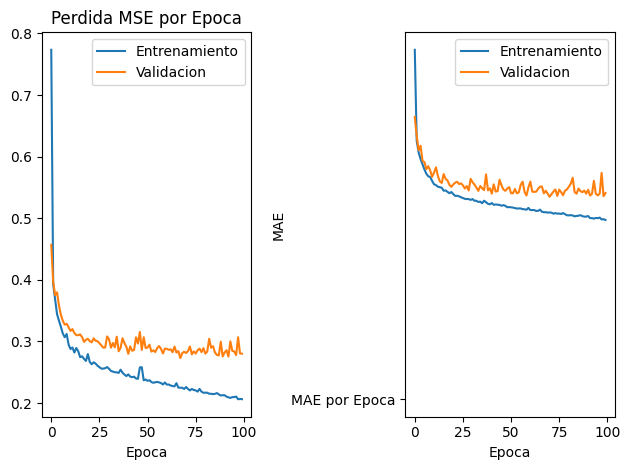

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


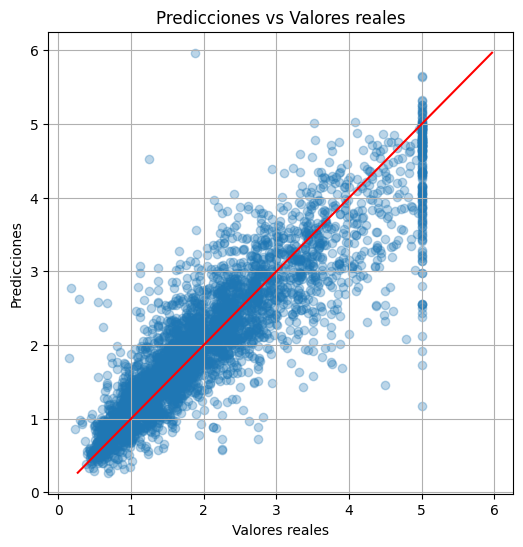

In [ ]:
#Perdida (MSE)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.title('Perdida MSE por Epoca')
plt.xlabel('MSE')
plt.xlabel('Epoca')
plt.legend()

#Error absoluto medio (MAE)
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validacion')
plt.plot('MAE por Epoca')
plt.xlabel('Epoca')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

#8. Predicciones vs reales

y_pred = model.predict(x_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


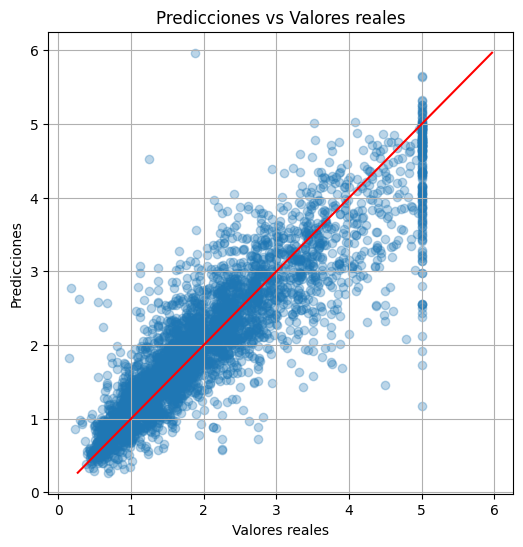

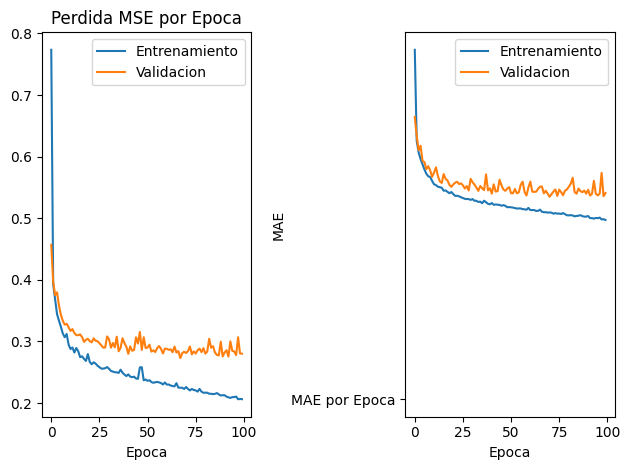

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


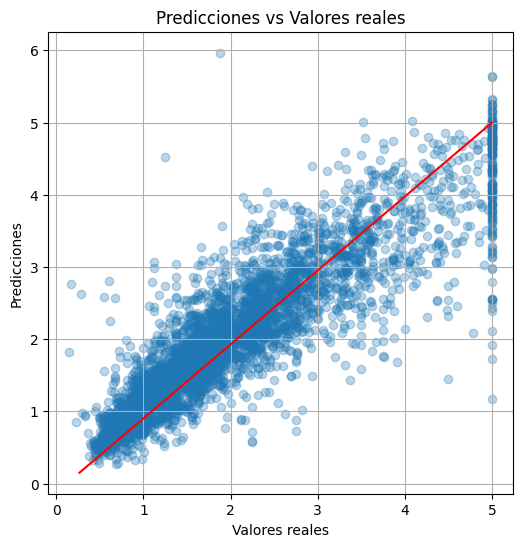

In [ ]:
#8. Predicciones vs reales

y_pred = model.predict(x_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.show()

#Perdida (MSE)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.title('Perdida MSE por Epoca')
plt.xlabel('MSE')
plt.xlabel('Epoca')
plt.legend()

#Error absoluto medio (MAE)
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validacion')
plt.plot('MAE por Epoca')
plt.xlabel('Epoca')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

#8. Predicciones vs reales

y_pred = model.predict(x_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_pred), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.show()